In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
boston= pd.read_csv(r'C:\Users\KIIT\Desktop\5th Semester\AP Lab\HousingData.csv')

In [3]:
print(boston)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [4]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
boston.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [6]:
X=  boston['RM']
X

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

In [7]:
X.isnull().sum()

0

In [8]:
Y=boston['MEDV']

In [9]:
Y.isnull().sum()

0

In [10]:
Y.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2)

In [13]:
print(X_train)
print('##########')
print(Y_train)

173    6.416
210    5.960
92     6.442
469    5.713
301    6.590
       ...  
430    6.348
444    5.854
347    6.516
485    6.312
145    6.130
Name: RM, Length: 404, dtype: float64
##########
173    23.6
210    21.7
92     22.9
469    20.1
301    22.0
       ... 
430    14.5
444    10.8
347    23.1
485    21.2
145    13.8
Name: MEDV, Length: 404, dtype: float64


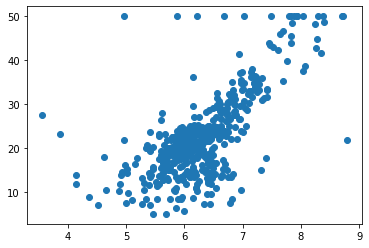

In [14]:
plt.scatter(X,Y)
plt.show()

In [18]:
m=0
c=0
cost=0

L=0.0001
epochs=1000

n=float(len(X))
print(n)

list_m=[]
list_c=[]
cost_list=[]

for i in range(epochs):
    Y_pred=(m*X) +c
    cost=(1/n)*sum((Y-Y_pred)**2)
    D_m= (-2/n)*sum(X*(Y-Y_pred))
    D_c= (-2/n)*sum(Y-Y_pred)
    m=m-L*D_m
    c=c-L*D_c
    list_m.append(D_m)
    list_c.append(D_c)
    cost_list.append(cost)

506.0


In [19]:
print(m)
print(c)
print(cost)

3.5759937183682804
0.4754543973042576
58.819967324194174


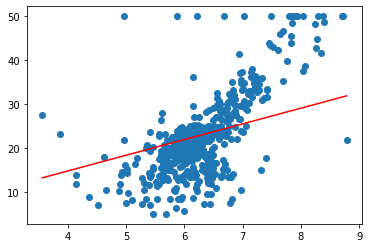

In [20]:
Y_pred = m*X + c

plt.scatter(X,Y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')
plt.show()